# IBM Employee Attrition

Data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

### Dependencies and data

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import tensorflow.keras as keras

%matplotlib inline

/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tribui/miniconda3/envs/minds/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tribui/miniconda3/envs/minds/lib/pyt

In [2]:
# Data
emp_df = pd.read_csv('data/ibm-employees.csv')
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

### Data preprocessing

In [3]:
# Categorical features
cat_feats = emp_df.dtypes[emp_df.dtypes == object].index.tolist()

# Unique counts
emp_df[cat_feats].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [4]:
# Remove `Over18` from list
cat_feats.remove('Over18')

# Drop `Over18`
emp_df.drop(columns='Over18', inplace=True)
emp_df.shape

(1470, 34)

In [5]:
# One-hot encoding
enc = OneHotEncoder(drop='if_binary', sparse=False)
emp_ohe = enc.fit_transform(emp_df[cat_feats])
emp_ohe = pd.DataFrame(emp_ohe, columns=enc.get_feature_names(cat_feats)) # convert to df
emp_ohe.head()

,Attrition_Yes,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Merge data
df = emp_df.merge(emp_ohe, left_index=True, right_index=True)

# Drop categorical columns
df.drop(columns=cat_feats, inplace=True)
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,49,279,8,1,1,2,3,61,2,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,37,1373,2,2,1,4,4,92,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,33,1392,3,4,1,5,4,56,3,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
4,27,591,2,1,1,7,1,40,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
# Feature/target split
X = df.drop(columns='Attrition_Yes')
y = df['Attrition_Yes']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=24)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1102, 52), (368, 52), (1102,), (368,))

In [10]:
# Scale data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train_scaled.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-1.757276,-1.342093,0.063851,-0.928254,0.0,0.399736,-1.570753,-1.025049,-1.000146,-0.972112,...,-0.279782,-0.342997,-0.242069,-0.503684,-0.531871,-0.235702,-0.544491,-0.93496,1.509888,-0.627035
1,-0.431348,-0.707979,0.063851,0.050632,0.0,-0.991895,-0.652953,-0.975917,-1.000146,-0.078645,...,-0.279782,-0.342997,-0.242069,-0.503684,1.880154,-0.235702,-0.544491,-0.93496,1.509888,-0.627035
2,0.121122,-1.361832,-0.297609,1.029518,0.0,-0.552521,1.182645,-0.975917,-1.000146,-0.078645,...,-0.279782,-0.342997,-0.242069,-0.503684,1.880154,-0.235702,-0.544491,-0.93496,1.509888,-0.627035
3,-0.541842,0.866204,0.666286,1.029518,0.0,1.529079,0.264846,-1.565506,0.387966,-0.078645,...,-0.279782,-0.342997,-0.242069,-0.503684,-0.531871,-0.235702,1.836577,-0.93496,-0.662301,-0.627035
4,-0.873324,-1.097823,0.425312,0.050632,0.0,1.343639,-1.570753,-0.484592,-1.000146,-0.972112,...,-0.279782,-0.342997,-0.242069,-0.503684,-0.531871,-0.235702,1.836577,-0.93496,-0.662301,1.594807


### Neural network

In [47]:
# Sequential NN
nn = keras.models.Sequential(name='i-8-6-o')

# Layers
nn.add(keras.layers.Dense(units=8, activation='relu', input_dim=X_train_scaled.shape[1])) # input + hidden layer 1 w/ 8 neurons
nn.add(keras.layers.Dense(units=6, activation='relu')) # hidden layer 2 w/ 6 neurons
nn.add(keras.layers.Dense(units=1, activation='sigmoid')) # output layer

nn.summary()

Model: "i-8-6-o"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 8)                 424       
_________________________________________________________________
dense_58 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 7         
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile model
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
nn_trained = nn.fit(X_train_scaled, y_train, epochs=100) # 100 iterations

# Evaluate model
print('\nModel evaluation on test set:')
nn.evaluate(X_test_scaled, y_test, verbose=2) # training loss and accuracy

Epoch 1/100
1102/1102 [==============================] - 0s 355us/sample - loss: 0.5061 - acc: 0.8385
Epoch 2/100
1102/1102 [==============================] - 0s 69us/sample - loss: 0.4750 - acc: 0.8385
Epoch 3/100
1102/1102 [==============================] - 0s 68us/sample - loss: 0.4513 - acc: 0.8385
Epoch 4/100
1102/1102 [==============================] - 0s 95us/sample - loss: 0.4331 - acc: 0.8385
Epoch 5/100
1102/1102 [==============================] - 0s 88us/sample - loss: 0.4178 - acc: 0.8385
Epoch 6/100
1102/1102 [==============================] - 0s 114us/sample - loss: 0.4050 - acc: 0.8385
Epoch 7/100
1102/1102 [==============================] - 0s 86us/sample - loss: 0.3939 - acc: 0.8385
Epoch 8/100
1102/1102 [==============================] - 0s 108us/sample - loss: 0.3837 - acc: 0.8385
Epoch 9/100
1102/1102 [==============================] - 0s 91us/sample - loss: 0.3745 - acc: 0.8385
Epoch 10/100
1102/1102 [==============================] - 0s 81us/sample - loss: 0.3648 

[0.5251603184834771, 0.84782606]

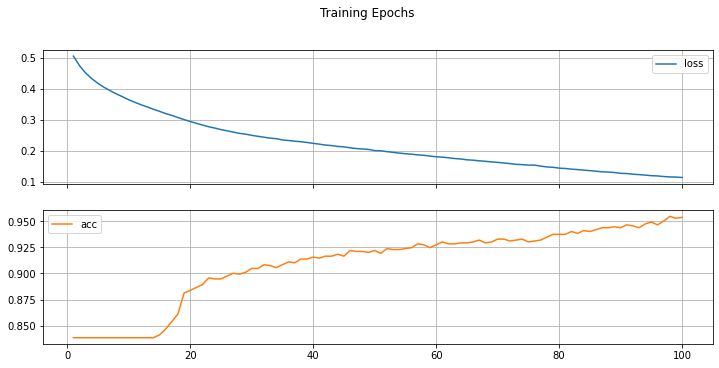

In [56]:
# Plot training loss and accuracy
nn_history = pd.DataFrame(nn_trained.history, index=range(1, len(nn_trained.history['loss']) + 1))
nn_history.plot(subplots=True, figsize=(12, 6), grid=True, title='Training Epochs')
plt.xticks(rotation=0, ha='center')
plt.show()